In [9]:
import os
import csv
import cv2
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import pandas as pd
%matplotlib inline
samples = []
with open('./data/driving_log.csv') as csvfile:
    reader = csv.reader(csvfile)
    for line in reader:
        samples.append(line)

In [10]:
samples = pd.DataFrame(samples)
samples.columns = samples.iloc[0]
samples = samples.reindex(samples.index.drop(0))

In [11]:
samples.head()

,center,left,right,steering,throttle,brake,speed
1,IMG/center_2016_12_01_13_30_48_287.jpg,IMG/left_2016_12_01_13_30_48_287.jpg,IMG/right_2016_12_01_13_30_48_287.jpg,0,0,0,22.14829
2,IMG/center_2016_12_01_13_30_48_404.jpg,IMG/left_2016_12_01_13_30_48_404.jpg,IMG/right_2016_12_01_13_30_48_404.jpg,0,0,0,21.87963
3,IMG/center_2016_12_01_13_31_12_937.jpg,IMG/left_2016_12_01_13_31_12_937.jpg,IMG/right_2016_12_01_13_31_12_937.jpg,0,0,0,1.453011
4,IMG/center_2016_12_01_13_31_13_037.jpg,IMG/left_2016_12_01_13_31_13_037.jpg,IMG/right_2016_12_01_13_31_13_037.jpg,0,0,0,1.438419
5,IMG/center_2016_12_01_13_31_13_177.jpg,IMG/left_2016_12_01_13_31_13_177.jpg,IMG/right_2016_12_01_13_31_13_177.jpg,0,0,0,1.418236


In [30]:
samples['steering'] = samples['steering'].astype(float)
samples['throttle'] = samples['throttle'].astype(float)
samples['brake'] = samples['brake'].astype(float)
samples['speed'] = samples['speed'].astype(float)

In [19]:
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = 14, 8

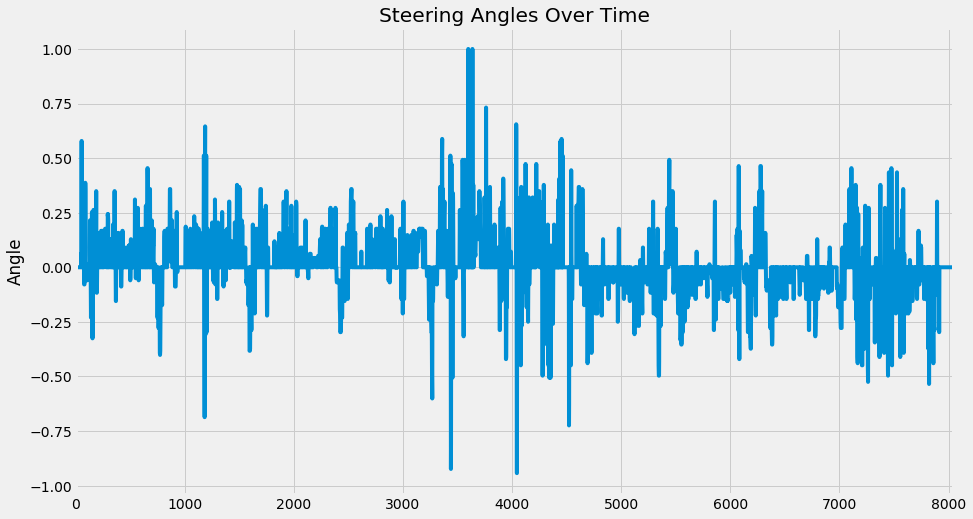

In [21]:

samples['steering'].plot()
plt.title('Steering Angles Over Time')
plt.ylabel('Angle')
plt.savefig('./examples/angles_over_time.png')


steering


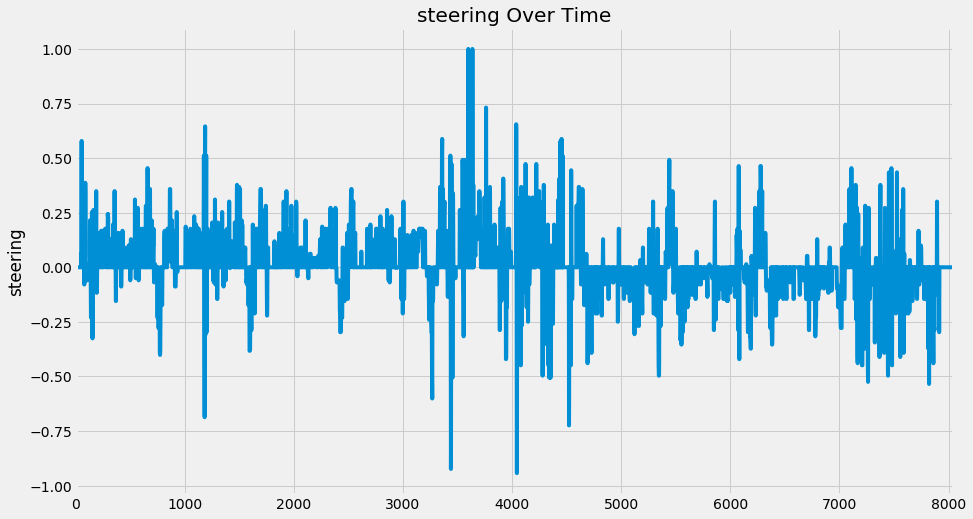

throttle


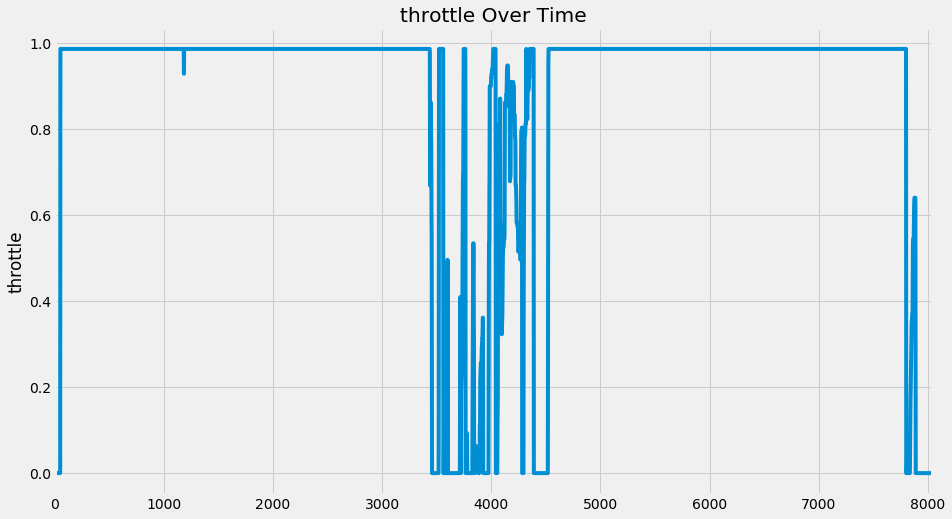

brake


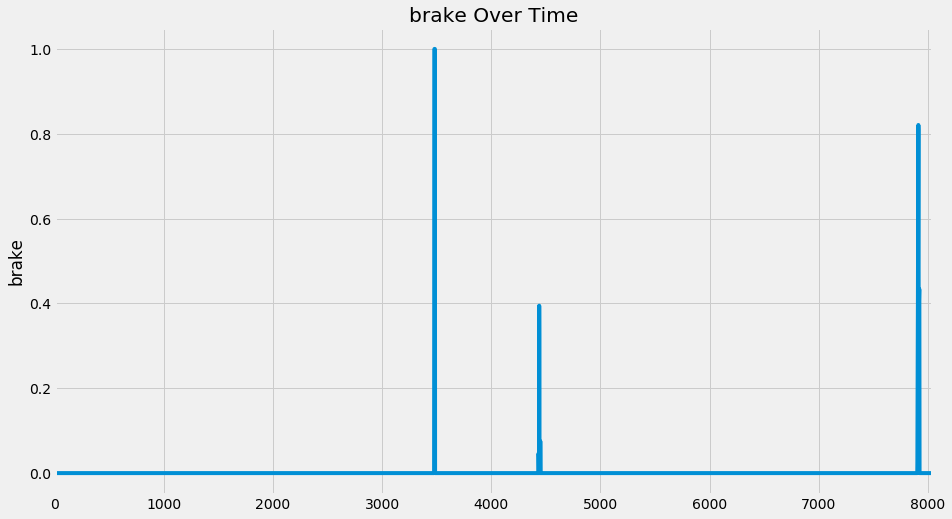

speed


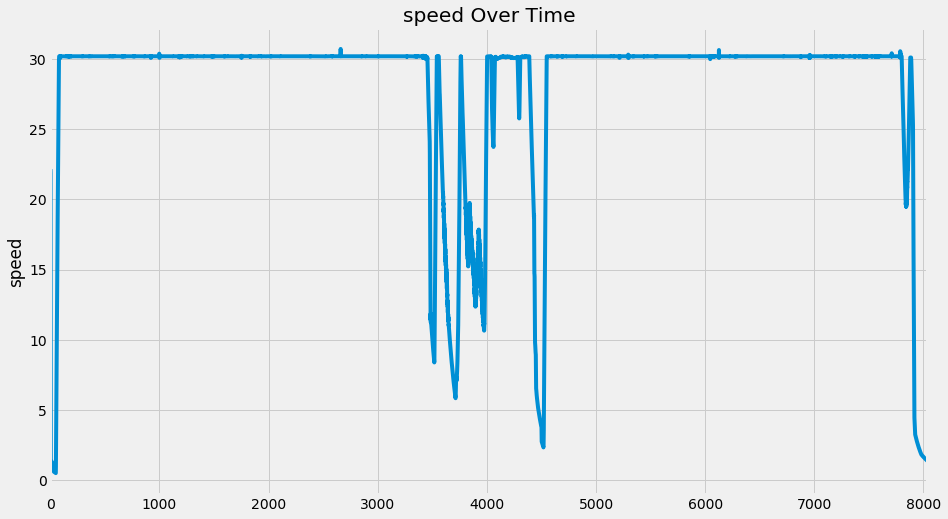

In [31]:
for col in samples.iloc[:,3:]:
    print (col)
    
    samples[col].plot()
    plt.title(str(col)+' Over Time')
    plt.ylabel(str(col))
    plt.savefig('./examples/'+str(col)+'_over_time.png')
    plt.show()


In [73]:
#Sample Images
from preprocessing import *

steering


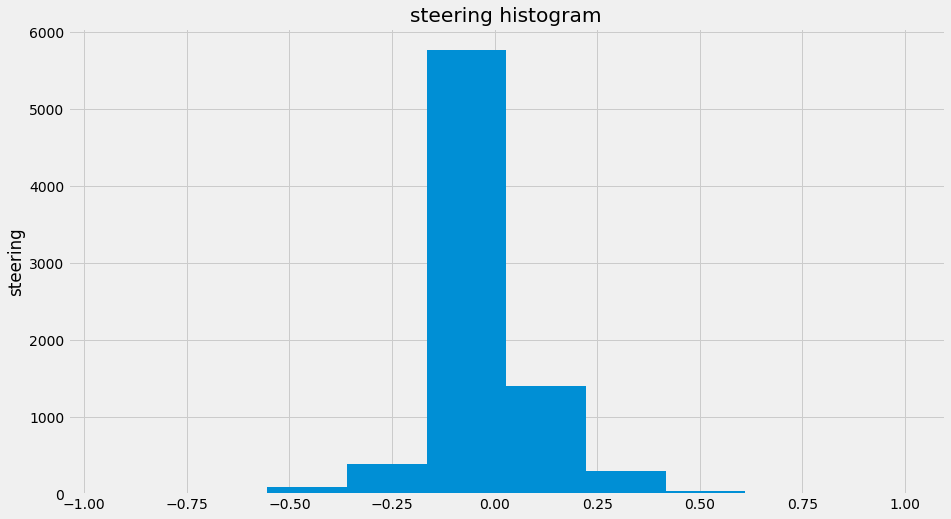

throttle


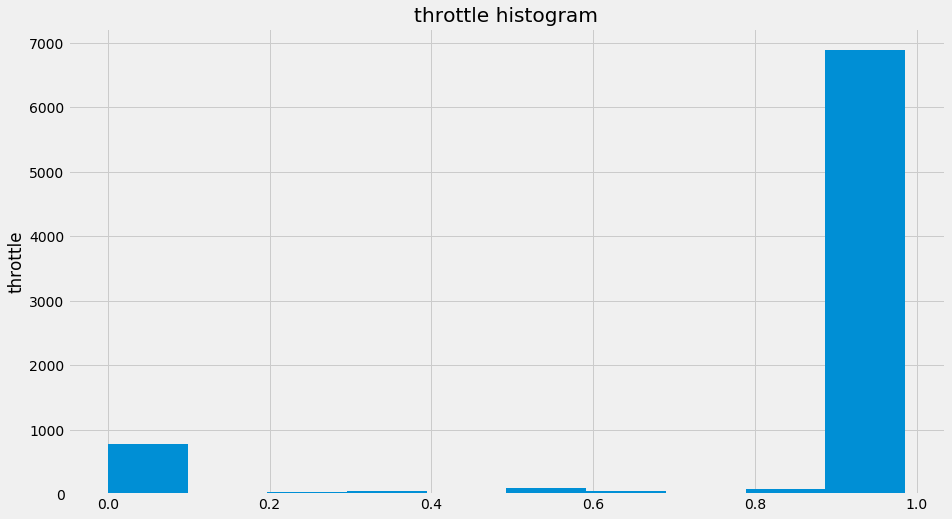

brake


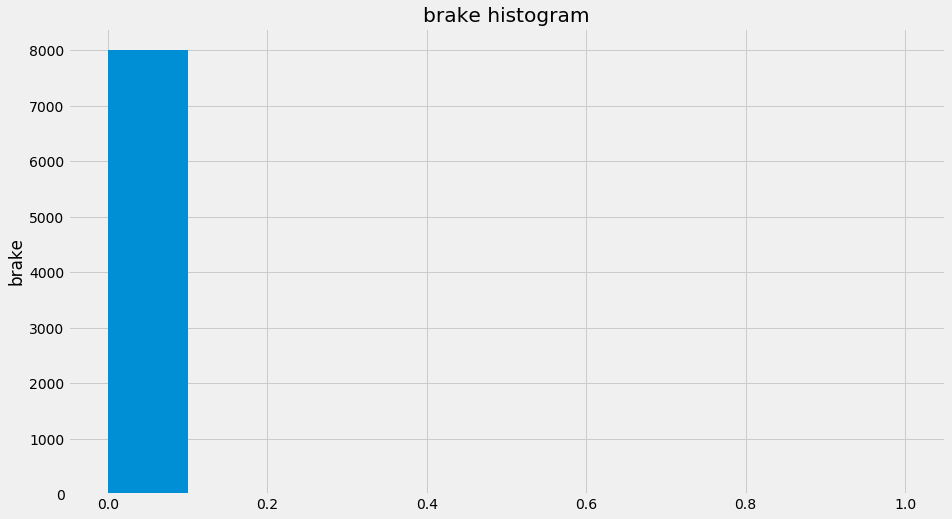

speed


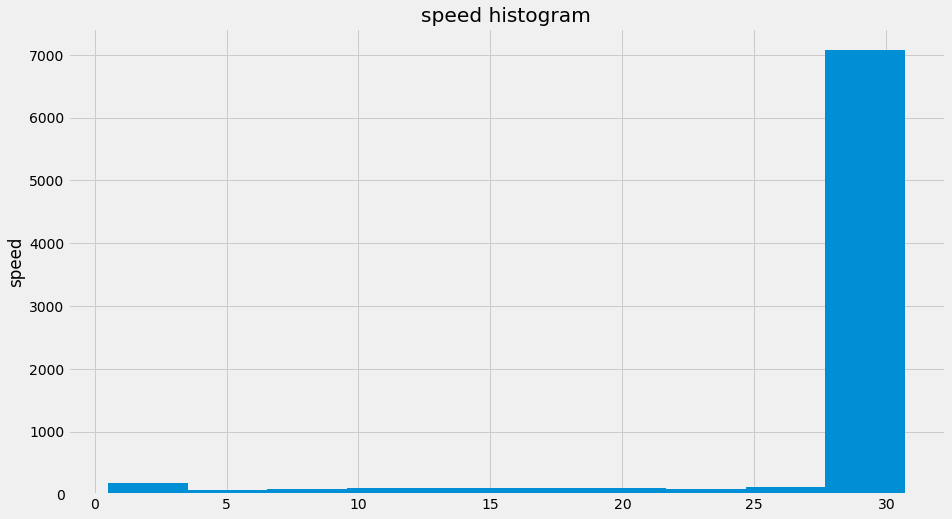

In [56]:
for col in samples.iloc[:,3:]:
    print (col)
    
    samples[col].hist()
    plt.title(str(col)+' histogram')
    plt.ylabel(str(col))
    plt.savefig('./examples/'+str(col)+'_histogram.png')
    plt.show()


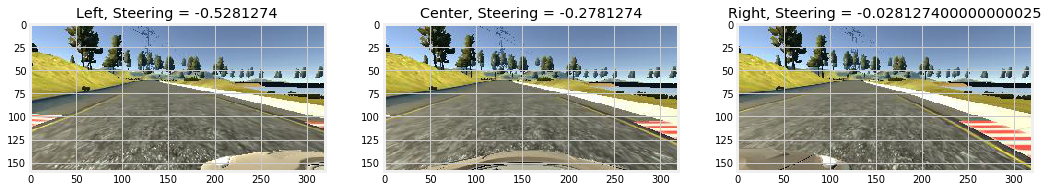

In [72]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

def imread_rgb(filename):
    source_path = filename
    filename = source_path.split('/')[-1]
    filename = source_path.split('\\')[-1]
    filename = filename.strip()
    current_path = './data/' + filename
    image = cv2.imread(current_path)
    return cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
#     return cv2.cvtColor(cv2.imread(filename), cv2.COLOR_BGR2RGB)

index = np.random.randint(len(samples))
correction = 0.25


center = imread_rgb(samples['center'][index])
left = imread_rgb(samples['left'][index])
right = imread_rgb(samples['right'][index])
steering = samples['steering'][index]

fig, ax = plt.subplots(1, 3, figsize=(16, 32))

ax[0].imshow(left)
ax[0].set_title('Left, Steering = {}'.format(steering - correction))
    
ax[1].imshow(center)
ax[1].set_title('Center, Steering = {}'.format(steering))
    
ax[2].imshow(right)
ax[2].set_title('Right, Steering = {}'.format(steering + correction))
plt.savefig('./examples/random_angles.png')
    
plt.show()

In [74]:
samples.head()

,center,left,right,steering,throttle,brake,speed
1,IMG/center_2016_12_01_13_30_48_287.jpg,IMG/left_2016_12_01_13_30_48_287.jpg,IMG/right_2016_12_01_13_30_48_287.jpg,0.0,0.0,0.0,22.148290
2,IMG/center_2016_12_01_13_30_48_404.jpg,IMG/left_2016_12_01_13_30_48_404.jpg,IMG/right_2016_12_01_13_30_48_404.jpg,0.0,0.0,0.0,21.879630
3,IMG/center_2016_12_01_13_31_12_937.jpg,IMG/left_2016_12_01_13_31_12_937.jpg,IMG/right_2016_12_01_13_31_12_937.jpg,0.0,0.0,0.0,1.453011
4,IMG/center_2016_12_01_13_31_13_037.jpg,IMG/left_2016_12_01_13_31_13_037.jpg,IMG/right_2016_12_01_13_31_13_037.jpg,0.0,0.0,0.0,1.438419
5,IMG/center_2016_12_01_13_31_13_177.jpg,IMG/left_2016_12_01_13_31_13_177.jpg,IMG/right_2016_12_01_13_31_13_177.jpg,0.0,0.0,0.0,1.418236


# **Behavioral Cloning Project**

The goals / steps of this project are the following:
* Use the simulator to collect data of good driving behavior
* Build, a convolution neural network in Keras that predicts steering angles from images
* Train and validate the model with a training and validation set
* Test that the model successfully drives around track one without leaving the road
* Summarize the results with a written report
---

[//]: # (Image References)

[image1]: ./examples/nvidia_architecture.png "NVIDIA Architecture"
[image2]: ./examples/corrected_angles.png "Random Images with Correction"
[image3]: ./examples/clip1.gif "Clip 1"
[image4]: ./examples/clip2.gif "Clip 2"
[image5]: ./examples/clip3.gif "Clip 3"
[image6]: ./examples/placeholder_small.png "Normal Image"
[image7]: ./examples/placeholder_small.png "Flipped Image"
[image8]: ./examples/samples_head.png "Udacity Data Preview"
[image9]: ./examples/steering_over_time.png "Steering Angles Over Time"
[image10]: ./examples/throttle_over_time.png "Throttle Over Time"
[image11]: ./examples/brake_over_time.png "Brake Over Time"
[image12]: ./examples/speed_over_time.png "Speed Over Time"
[image13]: ./examples/steering_histogram.png "Steering Angle Histogram"
[image14]: ./examples/throttle_histogram.png "Throttle Histogram"
[image15]: ./examples/brake_histogram.png "Brake Histogram"
[image16]: ./examples/speed_histogram.png "Speed Histogram"


## Rubric Points
#### Here I will consider the [rubric points](https://review.udacity.com/#!/rubrics/432/view) individually and describe how I addressed each point in my implementation.  

---
### Files Submitted & Code Quality

#### 1. Submission includes all required files and can be used to run the simulator in autonomous mode

My project includes the following files:
* model.py containing the script to create and train the model
* drive.py for driving the car in autonomous mode
* model.h5 containing a trained convolution neural network 
* writeup_report.md summarizing the results
* video.mp4: A video recording of the model.

#### 2. Submission includes functional code
Using the Udacity provided simulator and my drive.py file, the car can be driven autonomously around the track by executing 
```sh
python drive.py model.h5
```

#### 3. Submission code is usable and readable

The model.py file contains the code for training and saving the convolution neural network. The file shows the pipeline I used for training and validating the model, and it contains comments to explain how the code works.

---
### Model Architecture and Training Strategy

#### 1. An appropriate model architecture has been employed

My model is based on the NVIDIA architecture found in their paper [Deep Learning For Self Driving Cars](https://arxiv.org/pdf/1604.07316.pdf). It consists of three 5x5 kernels with 2x2 strides followed by two 3x3 kernels with a 1x1 stride. (model.py lines 165-229) 


![alt text][image1]


The model includes ELU layers to introduce nonlinearity, and initially the data wass normalized in the model using a Keras lambda layer but I removed it because it was not working as well as I would have liked. 

#### 2. Attempts to reduce overfitting in the model

The model contains dropout layers in order to reduce overfitting.  In addition, cropping was done so as to limit feature learning to just the track and not the surrounding environment.  It was also trained and validated on different data sets to ensure that the model was not overfitting. Finally, the model was tested by running it through the simulator and ensuring that the vehicle could stay on the track.

#### 3. Model parameter tuning

The model used an adam optimizer, so the learning rate was not tuned manually (model.py line 271).

#### 4. Appropriate training data

Training data was chosen to keep the vehicle driving on the road. I used a combination of center lane driving, recovering from the left and right sides of the road ... 

For details about how I created the training data, see the next section. 

---
### Model Architecture and Training Strategy

#### 1. Solution Design Approach

The overall strategy for deriving a model architecture was easy. Use the NVIDIA model.  Not only was it used to drive an actual car, it was heralded by numerous Udacity Forum posters and blog sites.

Also, much of the augmentation tactics described below come from this awesome blog post [An augmentation based deep neural network approach to learn human driving behavior](https://chatbotslife.com/using-augmentation-to-mimic-human-driving-496b569760a9). It was a huge help, so thanks Vivek!

This is a breakdown of the layers:    

 Layer            | Feature     |Kernel Size| Strides | Activation | border | Type |
------------------|-------------|-----------|---------|------------|--------|------|
**Input**         |(66,200,3)   |           |         |            |        |Input
**Normalization** |Lambda       |           |         |            |        |Preprocess
**Cropping2D**    |(70,25),(0,0)|           |         |            |        |Preprocess
**Convolution2D** |Filter: 24   |    5x5    |   2x2   |   elu      |  valid |Convolutional
**Dropout**       |0.3          |           |         |            |        |
**Convolution2D** |Filter: 36   |    5x5    |   2x2   |   elu      |  valid |Convolutional
**Dropout**       |0.3          |           |         |            |        |
**Convolution2D** |Filter: 48   |    5x5    |   2x2   |   elu      |  valid |Convolutional
**Dropout**       |0.3          |           |         |            |        |
**Convolution2D** |Filter: 64   |    3x3    |         |   elu      |  valid |Convolutional
**Dropout**       |0.3          |           |         |            |        |
**Convolution2D** |Filter: 64   |    3x3    |         |   elu      |  valid |Convolutional
**Flatten**       |             |           |         |            |        |
**Dense**         |Neurons: 100 |           |         |   elu      |        |Fully Connected
**Dropout**       |0.3          |           |         |            |        |
**Dense**         |Neurons: 50  |           |         |   elu      |        |Fully Connected
**Dropout**       |0.3          |           |         |            |        |
**Dense**         |Neurons: 10  |           |         |   elu      |        |Fully Connected
**Dense**         |Neurons: 1   |           |         |            |        |Output

Here is a visualization of the architecture

![alt text][image1]


#### 3. Creation of the Training Set & Training Process

The data used in this model came only from the supplied Udacity data.  Many adjustments were made to the data which generated additional samples, but I only used the supplied Udacity data.  The main reason for this was due to the almost unimaginable difficulty of capturing my own and generalizing on the autonomous vehicle.

I also used a generator for generating data which is more efficient than storing all of them in memory. Instead it's in batches and shuffles the data every epoch. Much better.

Let's take a quick peak into the Udacity data...

![alt text][image8]

As you can see, we are given 3 camera angles, along with steering, throttle, brake, and speed values at the time the frame was captured.  For this project, we need to predict the steering angle, but in order to predict the steering angle we need to preprocess the images and generate new data using the other columns of the data set.

Some of the augmenting we will be doing includes: randomly flipping images, shifting images, adding correction / recovery angles, and cropping/scaling images.

Let's take a look at our data to get a sense of why we make the augmentation decisions we do.

#### Angles over time
![alt text][image9]

As you can see, the data is pretty evenly distributed, give or take some of those turns in the middle

#### Angle Distribution
![alt text][image13]
Now we can look at how the angles are distributed. Given driving patterns and behavior, we know that there are many straight paths taken.  Straight paths = 0 steering angles, so we can deduce that there will be tons of 0 angles in this dataset.  This graph confirms it, so we need to correct for this bias.

#### Throttle over time
![alt text][image10]


#### Brake over time
![alt text][image11]
#### Speed over time
![alt text][image12]

After exploring the data, we I got to work on the image generation and augmentation steps.  You can find them in the helper file called `preprocessing.py`

```python
# Translate image 
def trans_image(image,steer,tr_range):    
    rows, cols, chans = image.shape

    flip_prob = np.random.uniform()
    # Per pixel horizontal translation and steering compensation   
    tr_x = tr_range*flip_prob-tr_range/2
    steer_ang = steer + tr_x/tr_range*.4    
    
    trans_m = np.float32([[1,0,tr_x],[0,1,0]])
    image_tr = cv2.warpAffine(image,trans_m,(cols,rows))
    
    return image_tr,steer_ang

# Crop image 
def crop_image(image, y1, y2, x1, x2):
    return image[y1:y2, x1:x2]

# Image Processing 
def preprocess_image(image, angle):        
    shape_y = image.shape[0]
    shape_x = image.shape[1]
    
    # 1. Normalize image to HSV 
    image=cv2.cvtColor(image,cv2.COLOR_RGB2HSV)        
    # 2. Translate image     
    tr_range = 50
    image, angle = trans_image(image, angle, tr_range)    
    # 3. Crop image   
    image = crop_image(image, 20, 140, 0+tr_range, shape_x-tr_range)    
    # 4. Resizing
    res = cv2.resize(image,(200,66))                 
    # 5. Flip image randomly
    angle_cor = angle     
    flip_prob = np.random.uniform()
    if flip_prob > .5:
        res=cv2.flip(res,1)
        if angle_cor!=0:
            angle_cor = -angle            
            
    return res, np.float32(angle_cor)

```

#### Data Augmentations
Let's elaborate more on the each augmentation:
    1. Translate
        * We translate or shift our image in either direction to generate more data for us.
    2. Crop
        * We crop the top of the image to remove the environment that enables noise to be brought into the algorithm.  We then rescale the image.
    3. Flip
        * This adds twice the data for us instead of training more.  Plus since it's just the flip of an existing image, meaning the sign is changed on the angle, we aren't introducing model bias towards a given direction.
        
        
## Issues and Evaluation
This project was very challenging but I'd like to thank the forum mentors for their helpful suggestions.  If it wasn't for them I'd still be driving into the dirt road on the simulator.

While I passed track 1, track 2 has given me difficulty. I believe it is due to either cropping / resizing too small or throttle issues as the car can't make it up hills.

In the future I'd like to develop a model using the comma.ai further. I tried it, however it's really just a remnant in my code as I couldn't get it to function well enough.

## Gifs
![alt text][image3]
![alt text][image4]
![alt text][image5]